<a href="https://colab.research.google.com/github/steven-mpawulo/KWS_NLP_DeepLearning/blob/main/KWS_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
import pandas as pd
import numpy as np 
import librosa
import librosa.display
from glob import glob
import IPython.display as ipd
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf



In [13]:
df = pd.read_csv('/content/drive/MyDrive/KWS Dataset/Train.csv')

In [14]:
df

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu
...,...,...
1104,audio_files/QNZECA9.wav,cassava
1105,audio_files/GUIY718.wav,harvesting
1106,audio_files/W38UIGC.wav,farm
1107,audio_files/E04FSN7.wav,nakavundira


In [ ]:
# !unzip "/content/drive/MyDrive/KWS Dataset/audio_files.zip" -d "/content/drive/MyDrive/audio_files"

In [ ]:
# !unzip "/content/drive/MyDrive/KWS Dataset/AdditionalUtterances.zip" -d "/content/drive/MyDrive/more_audio_files"

In [ ]:
# !unzip "/content/drive/MyDrive/KWS Dataset/nlp_keywords_29Oct2020.zip" -d "/content/drive/MyDrive/nlp_keywords"

In [15]:
files =  glob('/content/drive/MyDrive/audio_files/audio_files/*.wav')

In [16]:
len(files)

2126

In [7]:
ipd.Audio(files[5])

In [8]:
data, sr = librosa.load(files[5])

In [9]:
z = librosa.feature.melspectrogram(y=data, sr=sr)

In [10]:
z.shape

(128, 106)

In [11]:
librosa.util.normalize(z)

array([[1.19028211e-01, 3.27035971e-02, 2.17644172e-03, ...,
        2.61923069e-05, 1.52895100e-05, 2.20138827e-04],
       [2.94660982e-02, 1.21435942e-02, 9.81771620e-04, ...,
        1.67256949e-05, 5.85888529e-06, 2.68556527e-04],
       [3.03283315e-02, 1.62682049e-02, 2.65260832e-03, ...,
        1.21642789e-03, 3.35656165e-04, 3.58721125e-04],
       ...,
       [3.66450986e-05, 8.90826504e-06, 1.84797727e-06, ...,
        1.10708644e-10, 1.36715236e-10, 7.58701162e-06],
       [7.34155037e-06, 3.45701801e-06, 1.02606305e-06, ...,
        1.34620010e-10, 1.47384063e-10, 5.93056302e-06],
       [9.22059655e-07, 4.34326751e-07, 8.61506493e-08, ...,
        4.42106039e-11, 4.29724034e-11, 2.69271686e-06]], dtype=float32)

In [14]:
new = pd.Series(data)

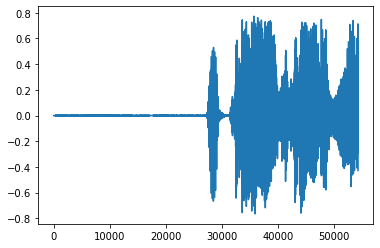

In [15]:
new.plot()

In [16]:
D = librosa.stft(data)

In [17]:
s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [18]:
s_db.shape

(1025, 106)

In [15]:
m = s_db[:, :119]

In [16]:
w = np.resize(s_db,(1025, 119))

In [17]:
w.shape

(1025, 119)

In [18]:
m.shape

(1025, 106)

In [19]:
s_db

array([[-70.85077 , -71.07749 , -72.89743 , ..., -55.274986, -51.58219 ,
        -44.378586],
       [-79.13173 , -75.02063 , -78.6239  , ..., -55.34185 , -53.09505 ,
        -48.49996 ],
       [-79.273735, -80.      , -80.      , ..., -58.946594, -54.31479 ,
        -43.544853],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -66.67389 ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -66.6548  ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -66.62116 ]], dtype=float32)

In [20]:
librosa.util.normalize(s_db)

array([[-0.8856346 , -0.8884686 , -0.91121787, ..., -0.69093734,
        -0.6447774 , -0.5547323 ],
       [-0.9891466 , -0.93775785, -0.98279876, ..., -0.6917731 ,
        -0.6636881 , -0.6062495 ],
       [-0.9909217 , -1.        , -1.        , ..., -0.73683244,
        -0.6789349 , -0.5443107 ],
       ...,
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -0.8334236 ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -0.833185  ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -0.8327645 ]], dtype=float32)

In [21]:
s_db.dtype

dtype('float32')

In [22]:
new_s_db = w.reshape(1025, 119, 1)

In [23]:
new_s_db.shape

(1025, 119, 1)

In [24]:
s_db.dtype

dtype('float32')

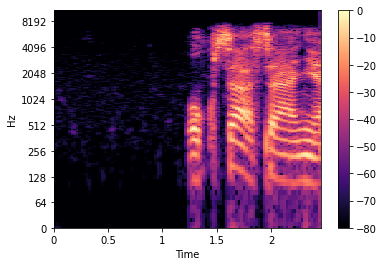

In [23]:
plt.figure()
librosa.display.specshow(s_db, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
# audioList = []
# labelList = []
# def convertAudioToSpec(filename, label):
#   pathToDirectory = "/content/drive/MyDrive/audio_files/"
#   path = pathToDirectory+filename
#   data, sr = librosa.load(path)
#   D = librosa.stft(data)
#   s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
#   audioList.append(s_db)
#   labelList.append(label)

#   return {"audio": np.array(audioList, dtype="float32"), "label": labelList}

# result = convertAudioToSpec("audio_files/5A9LAVW.wav", "amakoola")
# # print(result["audio"][0])
# me = result["audio"][0]
# me.shape
# me.dtype

# audioList = []
# labelList = []



In [64]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

In [65]:
def convertAudioToSpec(filename, label):
  pathToDirectory = "/content/drive/MyDrive/audio_files/"
  path = pathToDirectory+filename
  data, sr = librosa.load(path)
  z = librosa.feature.melspectrogram(y=data, sr=sr, hop_length=512, n_mels=128, time_steps=384)
  melspec = librosa.power_to_db(z).astype(np.float32)
  new_melspec= librosa.util.normalize(melspec)
  m = np.resize(new_melspec,(128, 119))
  # D = librosa.stft(data)
  # s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  # new_s_db = librosa.util.normalize(s_db)
  # m=np.resize(new_s_db,(128, 119))
  audioList.append(m)
  labelList.append(label)

  return {"audio": audioList, "label": labelList}

In [18]:
audioList = []
labelList = []
for row in df.itertuples(index=False, name="Audio"):
  convertAudioToSpec(row[0], row[1])
  



In [19]:
dataSet = {"audio": audioList, "label": labelList}


In [20]:
converted_dataSet = pd.DataFrame(dataSet)

In [21]:
converted_dataSet

,audio,label
0,"[[-0.9696905, -0.9430456, -0.9428764, -0.94049...",akawuka
1,"[[0.1614751, 0.25854754, 0.29100934, 0.2267613...",banana
2,"[[0.36417183, 0.35690024, 0.41392255, 0.316489...",obulwadde
3,"[[-0.6553665, -0.7043578, -0.62507963, -0.6131...",nnyaanya
4,"[[-0.61369365, -0.45611295, -0.47570482, -0.68...",pampu
...,...,...
1104,"[[0.6861018, 0.7898971, 0.7373877, 0.58102375,...",cassava
1105,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",harvesting
1106,"[[-0.03448691, -0.020345028, -0.024596712, -0....",farm
1107,"[[-0.60126936, -0.59614474, -0.66231316, -0.66...",nakavundira


In [42]:
welcome = []
for data in converted_dataSet['audio']:
  welcome.append(data.shape[1])
u = pd.Series(welcome)
u.unique()


array([106, 108, 109,  44,  57, 101, 119,  47, 104, 114,  86, 107])

In [22]:
encoder = LabelEncoder()

In [23]:
converted_dataSet["label"] = encoder.fit_transform(converted_dataSet["label"])

In [24]:
converted_dataSet

,audio,label
0,"[[-0.9696905, -0.9430456, -0.9428764, -0.94049...",10
1,"[[0.1614751, 0.25854754, 0.29100934, 0.2267613...",16
2,"[[0.36417183, 0.35690024, 0.41392255, 0.316489...",141
3,"[[-0.6553665, -0.7043578, -0.62507963, -0.6131...",137
4,"[[-0.61369365, -0.45611295, -0.47570482, -0.68...",169
...,...,...
1104,"[[0.6861018, 0.7898971, 0.7373877, 0.58102375,...",22
1105,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",97
1106,"[[-0.03448691, -0.020345028, -0.024596712, -0....",87
1107,"[[-0.60126936, -0.59614474, -0.66231316, -0.66...",129


In [25]:
X = converted_dataSet['audio']
y = converted_dataSet['label']

In [ ]:
# y.nunique()

193

In [ ]:
# e = tf.constant(4)

In [27]:
# wel = X[0]
# wel.shape

(1025, 119)

In [ ]:
# wel = wel.reshape(1025, 119,1)

In [ ]:
# wel.shape

(1025, 119, 1)

In [ ]:
# b = tf.constant(wel, )

In [ ]:
# b.shape

TensorShape([1025, 119, 1])

In [63]:
tensorList = []
shapeList = []
for x in X:
  # print(x.shape[1])
  x = x.reshape(128, 119,1)
  x = tf.constant(x, shape=(128, 119,1))
  tensorList.append(x)
  # if (x.shape[1] == 44):
  #   x = x.reshape(1025, 44,1)
  #   x = tf.constant(x, shape=(1025, 44, 1))
  #   tensorList.append(x)
  # # elif (x.shape[1] == 47):
  #   x = x.reshape(1025, 47,1)
  #   x = tf.constant(x, shape=(1025, 47, 1))
  #   tensorList.append(x)
  # elif (x.shape[1] == 57):
  #   x = x.reshape(1025, 57,1)
  #   x = tf.constant(x, shape=(1025, 57, 1))
  #   tensorList.append(x)
  # elif (x.shape[1] == 86):
  #   x = x.reshape(1025, 86,1)
  #   x = tf.constant(x, shape=(1025, 86, 1))
  #   tensorList.append(x)
  # elif (x.shape[1] == 101):
  #   x = x.reshape(1025, 101,1)
  #   x = tf.constant(x, shape=(1025, 101, 1))
  #   tensorList.append(x)
  # elif (x.shape[1] == 104):
  #   x = x.reshape(1025, 104,1)
  #   x = tf.constant(x, shape=(1025, 104, 1))
  #   tensorList.append(x)


In [27]:
len(tensorList)

1109

In [61]:
labelList = []
for i in y:
  labelList.append(i)


In [62]:
len(labelList)

1109

In [30]:
ll = tf.keras.utils.to_categorical(labelList)

In [31]:
ll.shape

(1109, 193)

In [32]:
new_ll = tf.constant(ll,)

In [33]:
new_ll.shape

TensorShape([1109, 193])

In [34]:
newAudioLabel = np.array(new_ll)

In [35]:
newAudioLabel.shape

(1109, 193)

In [36]:
audioLabel = np.array(labelList).astype('float32')

In [37]:
audioLabel.shape

(1109,)

In [38]:
audioLabel[0]

10.0

In [39]:
audioData = np.array(tensorList)

In [40]:
audioData.shape

(1109, 128, 119, 1)

In [ ]:
# shapes = np.array(shapeList)

In [ ]:
# np.unique(shapes)

In [ ]:
# X.dtype

In [ ]:
# new_array = X.to_numpy()

In [ ]:
# new_array.dtype

In [ ]:
# X.shape

In [41]:
Xtrain, Xval, ytrain, yval = train_test_split(audioData,audioLabel, test_size=0.2, random_state=42)

In [42]:
Xtrain.shape

(887, 128, 119, 1)

In [87]:
Xtrain[0]

array([[[1.6208194e-03],
        [1.7211647e-04],
        [8.3687692e-06],
        ...,
        [1.1318838e-04],
        [1.7225331e-05],
        [4.8651236e-06]],

       [[9.2120408e-06],
        [1.3814156e-05],
        [3.1315431e-06],
        ...,
        [2.6407002e-05],
        [4.4440243e-05],
        [1.2903352e-04]],

       [[9.6140684e-05],
        [5.5951961e-05],
        [1.6284740e-04],
        ...,
        [6.4293148e-05],
        [1.7743217e-04],
        [2.1181046e-04]],

       ...,

       [[1.0000000e+00],
        [6.3618469e-01],
        [2.2462094e-01],
        ...,
        [1.8164610e-02],
        [8.2766945e-03],
        [2.9410298e-03]],

       [[1.0415566e-03],
        [3.0530768e-03],
        [9.4806543e-03],
        ...,
        [6.8926933e-04],
        [7.7113655e-04],
        [6.1773969e-04]],

       [[2.9649590e-03],
        [1.8151937e-03],
        [7.2605890e-04],
        ...,
        [1.5012835e-01],
        [2.1990182e-01],
        [3.4459251e-01]]

In [43]:
Xval.shape

(222, 128, 119, 1)

In [44]:
ytrain.shape

(887,)

In [45]:
yval.shape

(222,)

In [46]:
yval[8]

8.0

In [50]:
from tensorflow import keras
from keras import layers
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(193, activation="softmax"),
    ]
)




In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
EPOCHS = 15

history = model.fit(Xtrain, ytrain, epochs = EPOCHS)

Epoch 1/15
28/28 [==============================] - 21s 702ms/step - loss: 5.5436 - accuracy: 0.0056
Epoch 2/15
28/28 [==============================] - 20s 701ms/step - loss: 5.1862 - accuracy: 0.0090
Epoch 3/15
28/28 [==============================] - 20s 700ms/step - loss: 5.0389 - accuracy: 0.0248
Epoch 4/15
28/28 [==============================] - 20s 698ms/step - loss: 4.7186 - accuracy: 0.0609
Epoch 5/15
28/28 [==============================] - 20s 700ms/step - loss: 4.0576 - accuracy: 0.1432
Epoch 6/15
28/28 [==============================] - 20s 701ms/step - loss: 3.0454 - accuracy: 0.3258
Epoch 7/15
28/28 [==============================] - 20s 700ms/step - loss: 1.8958 - accuracy: 0.5682
Epoch 8/15
28/28 [==============================] - 20s 702ms/step - loss: 1.1608 - accuracy: 0.7373
Epoch 9/15
28/28 [==============================] - 20s 699ms/step - loss: 0.6209 - accuracy: 0.8501
Epoch 10/15
28/28 [==============================] - 20s 698ms/step - loss: 0.3962 - accura

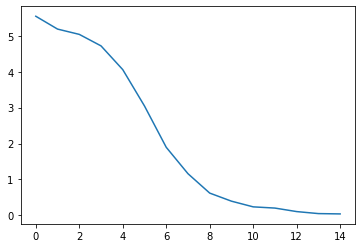

In [53]:

plt.plot(history.history['loss'])


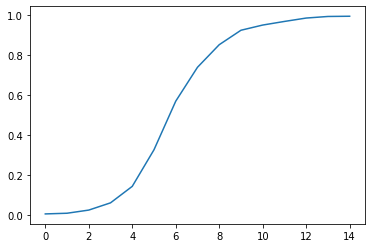

In [54]:
plt.plot(history.history['accuracy'],)

In [56]:
results = model.evaluate(Xval, yval)

7/7 [==============================] - 1s 164ms/step - loss: 8.8285 - accuracy: 0.1441


In [55]:
predictions = model.predict(Xval)

In [57]:
np.argmax(predictions[2])

131

In [59]:
yval[2]

171.0